# Libraries

In [1]:
# install.packages('')

In [2]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=8,repr.plot.height=4)

# Read data

In [3]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Ads_CTR_Optimisation.csv')
str(df)

'data.frame':	10000 obs. of  10 variables:
 $ Ad.1 : int  1 0 0 0 0 1 0 1 0 0 ...
 $ Ad.2 : int  0 0 0 1 0 1 0 1 0 0 ...
 $ Ad.3 : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Ad.4 : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Ad.5 : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Ad.6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Ad.7 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Ad.8 : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Ad.9 : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Ad.10: int  0 0 0 0 0 0 0 0 0 0 ...


In [4]:
colMeans(df)

Ad.1   Ad.2   Ad.3   Ad.4   Ad.5   Ad.6   Ad.7   Ad.8   Ad.9  Ad.10 
0.1703 0.1295 0.0728 0.1196 0.2695 0.0126 0.1112 0.2091 0.0952 0.0489

# Upper Confidence Bound

In [36]:
show=function(pos){
    if(randomizeStream){
        record_pos=sample(1:numShows,1)
    } else {
        record_pos=sum(n)+1
    }
    n[pos]<<-n[pos]+1
    s[pos]<<-s[pos]+df[record_pos,pos]
}

compute=function(){
    a<<-sapply(1:numBandits,FUN=function(pos){s[pos]/n[pos]})
    u<<-sapply(1:numBandits,FUN=function(pos){a[pos]+sqrt(3/2*log(sum(n))/n[pos])})
    if(sd(u)!=0){
        probs=sapply(u,FUN=function(ucb){exp((ucb-mean(u))/sd(u))})
    } else {
        probs=rep(1,numBandits)
    }
    p<<-sapply(probs,FUN=function(prob){prob/sum(probs)})
}

report=function(){
    writeLines(noquote(paste('=== State at round',sum(n),'===')))
    writeLines(noquote(paste('Total score:',sum(s))))
    writeLines('Bandit  Num  Scr  Avg  UCB  Prb')
    for(pos in 1:numBandits){
        writeLines(noquote(paste(format(pos,   width=4),' ',
                                 format(n[pos],width=4),
                                 format(s[pos],width=4),
                                 sprintf('%4.2f',a[pos]),
                                 sprintf('%4.2f',u[pos]),
                                 sprintf('%4.2f',p[pos]))))
    }
}

seed=function(){
    seedPosLst=1:numBandits
    if(randomizeSeed){
        seedPosLst=sample(seedPosLst)
    }
    writeLines(noquote(paste(c('Seeding [',seedPosLst,']...'),collapse=' ')))
    for(pos in seedPosLst){
        show(pos)
    }
    compute()
    report()
}

streamItToMe=function(numRounds=100){
    for(r in 1:numRounds){
        if(useProbs){
            pos=sample(1:numBandits,1,prob=p)
        } else {
            pos=which.max(u)
        }
        show(pos)
        compute()
    }
    report()
}

In [37]:
seedRounds=1
randomizeSeed=FALSE
randomizeStream=FALSE
useProbs=FALSE

In [38]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
n=integer(numBandits)
s=integer(numBandits)
a=numeric(numBandits)
u=numeric(numBandits)
p=numeric(numBandits)

In [39]:
seed()

Seeding [ 1 2 3 4 5 6 7 8 9 10 ]...
=== State at round 10 ===
Total score: 1
Bandit  Num  Scr  Avg  UCB  Prb
   1      1    1 1.00 2.86 0.72
   2      1    0 0.00 1.86 0.03
   3      1    0 0.00 1.86 0.03
   4      1    0 0.00 1.86 0.03
   5      1    0 0.00 1.86 0.03
   6      1    0 0.00 1.86 0.03
   7      1    0 0.00 1.86 0.03
   8      1    0 0.00 1.86 0.03
   9      1    0 0.00 1.86 0.03
  10      1    0 0.00 1.86 0.03


In [40]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 2211
Bandit  Num  Scr  Avg  UCB  Prb
   1    502   74 0.15 0.31 0.04
   2    364   43 0.12 0.31 0.03
   3    278   25 0.09 0.31 0.02
   4    317   33 0.10 0.31 0.02
   5   6434 1730 0.27 0.32 0.68
   6    147    1 0.01 0.31 0.05
   7    326   35 0.11 0.31 0.04
   8   1130  229 0.20 0.31 0.04
   9    331   36 0.11 0.31 0.03
  10    171    5 0.03 0.31 0.05


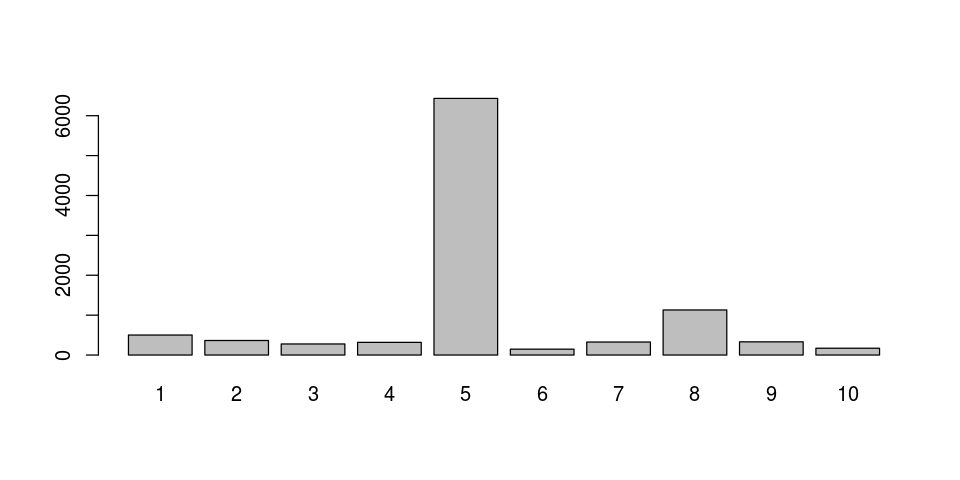

In [41]:
barplot(n,names.arg=1:numBandits)

In [42]:
seedRounds=1
randomizeSeed=TRUE
randomizeStream=FALSE
useProbs=FALSE

In [43]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
n=integer(numBandits)
s=integer(numBandits)
a=numeric(numBandits)
u=numeric(numBandits)
p=numeric(numBandits)

In [44]:
seed()

Seeding [ 3 9 1 5 4 2 7 6 10 8 ]...
=== State at round 10 ===
Total score: 2
Bandit  Num  Scr  Avg  UCB  Prb
   1      1    0 0.00 1.86 0.03
   2      1    1 1.00 2.86 0.36
   3      1    0 0.00 1.86 0.03
   4      1    0 0.00 1.86 0.03
   5      1    0 0.00 1.86 0.03
   6      1    0 0.00 1.86 0.03
   7      1    0 0.00 1.86 0.03
   8      1    0 0.00 1.86 0.03
   9      1    1 1.00 2.86 0.36
  10      1    0 0.00 1.86 0.03


In [45]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 2204
Bandit  Num  Scr  Avg  UCB  Prb
   1    852  160 0.19 0.32 0.06
   2    333   37 0.11 0.31 0.02
   3    230   16 0.07 0.31 0.02
   4    360   43 0.12 0.32 0.10
   5   6007 1610 0.27 0.32 0.50
   6    152    2 0.01 0.31 0.02
   7    351   41 0.12 0.32 0.07
   8   1217  254 0.21 0.32 0.08
   9    323   35 0.11 0.32 0.06
  10    175    6 0.03 0.32 0.08


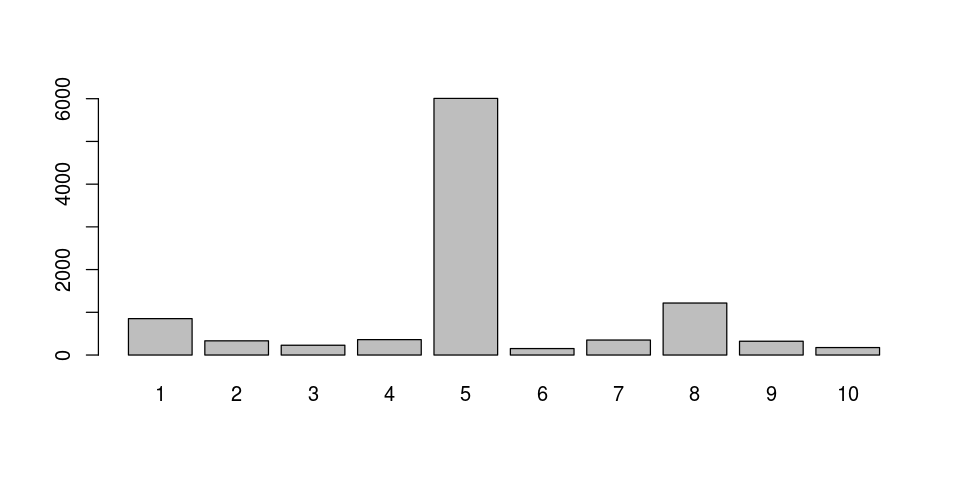

In [46]:
barplot(n,names.arg=1:numBandits)

In [47]:
seedRounds=1
randomizeSeed=TRUE
randomizeStream=TRUE
useProbs=FALSE

In [48]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
n=integer(numBandits)
s=integer(numBandits)
a=numeric(numBandits)
u=numeric(numBandits)
p=numeric(numBandits)

In [49]:
seed()

Seeding [ 6 10 3 2 4 8 7 9 1 5 ]...
=== State at round 10 ===
Total score: 3
Bandit  Num  Scr  Avg  UCB  Prb
   1      1    0 0.00 1.86 0.03
   2      1    1 1.00 2.86 0.26
   3      1    0 0.00 1.86 0.03
   4      1    0 0.00 1.86 0.03
   5      1    0 0.00 1.86 0.03
   6      1    0 0.00 1.86 0.03
   7      1    1 1.00 2.86 0.26
   8      1    1 1.00 2.86 0.26
   9      1    0 0.00 1.86 0.03
  10      1    0 0.00 1.86 0.03


In [50]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 2249
Bandit  Num  Scr  Avg  UCB  Prb
   1    610  102 0.17 0.32 0.04
   2    392   51 0.13 0.32 0.06
   3    195   10 0.05 0.32 0.01
   4    291   29 0.10 0.32 0.02
   5   6364 1730 0.27 0.32 0.49
   6    143    1 0.01 0.32 0.05
   7    328   37 0.11 0.32 0.12
   8   1190  250 0.21 0.32 0.06
   9    271   25 0.09 0.32 0.12
  10    216   14 0.06 0.32 0.04


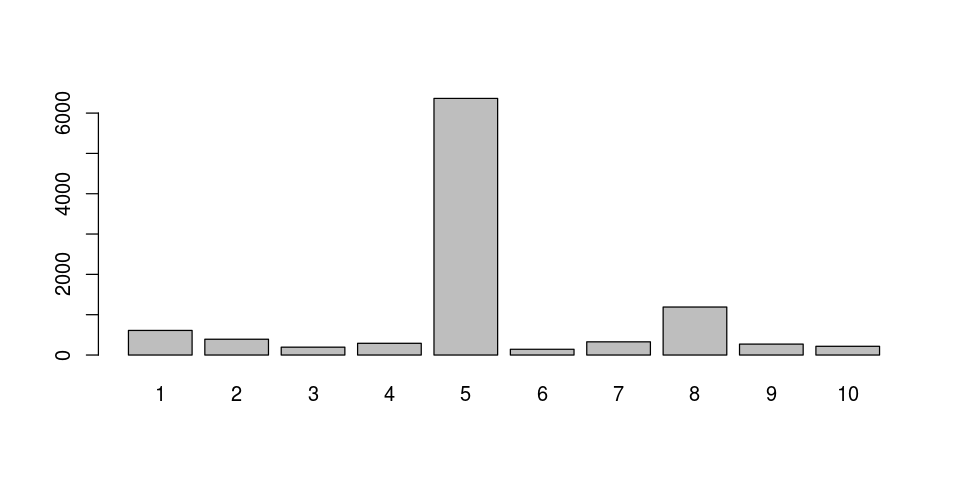

In [51]:
barplot(n,names.arg=1:numBandits)

In [52]:
seedRounds=1
randomizeSeed=TRUE
randomizeStream=TRUE
useProbs=TRUE

In [53]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
n=integer(numBandits)
s=integer(numBandits)
a=numeric(numBandits)
u=numeric(numBandits)
p=numeric(numBandits)

In [54]:
seed()

Seeding [ 3 9 10 2 5 1 4 7 8 6 ]...
=== State at round 10 ===
Total score: 1
Bandit  Num  Scr  Avg  UCB  Prb
   1      1    0 0.00 1.86 0.03
   2      1    0 0.00 1.86 0.03
   3      1    0 0.00 1.86 0.03
   4      1    0 0.00 1.86 0.03
   5      1    1 1.00 2.86 0.72
   6      1    0 0.00 1.86 0.03
   7      1    0 0.00 1.86 0.03
   8      1    0 0.00 1.86 0.03
   9      1    0 0.00 1.86 0.03
  10      1    0 0.00 1.86 0.03


In [55]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 1974
Bandit  Num  Scr  Avg  UCB  Prb
   1   1066  185 0.17 0.29 0.08
   2    637   83 0.13 0.28 0.05
   3    381   30 0.08 0.27 0.04
   4    551   64 0.12 0.27 0.05
   5   4297 1172 0.27 0.33 0.52
   6    242    2 0.01 0.25 0.01
   7    544   60 0.11 0.27 0.04
   8   1595  331 0.21 0.30 0.15
   9    439   41 0.09 0.27 0.04
  10    248    6 0.02 0.26 0.03


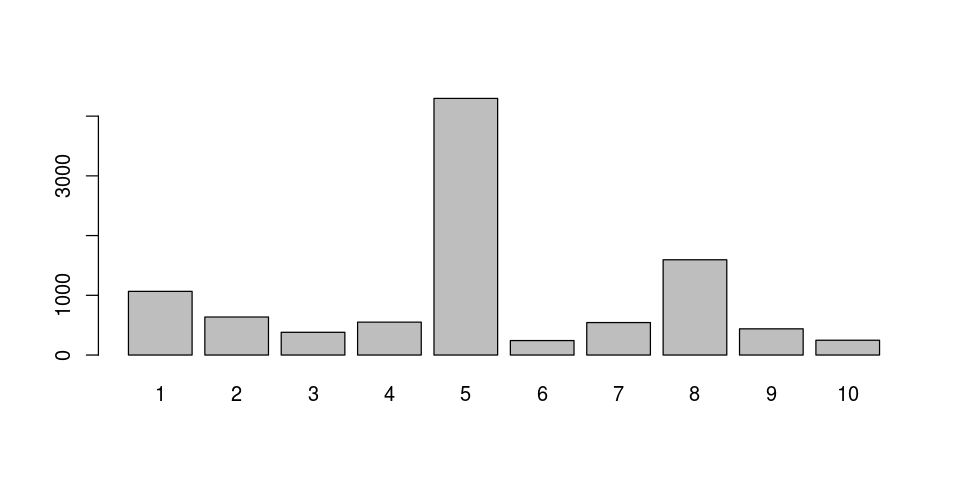

In [56]:
barplot(n,names.arg=1:numBandits)